In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('criminal_train.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['Criminal','PERID'],axis=1))
scaled_features = scaler.transform(df.drop(['Criminal','PERID'],axis=1))
X_train = pd.DataFrame(scaled_features,columns=df.columns[1:-1])
y=df.iloc[:,-1]

# Training


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

In [14]:
knn.fit(X_train,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [6]:
df2=pd.read_csv('criminal_test.csv')
scaler.fit(df2.drop(['100100'],axis=1))
scaled_features1 = scaler.transform(df2.drop(['100100'],axis=1))
X_test = pd.DataFrame(scaled_features1,columns=df2.columns[1:71])

# choosing a k value

In [5]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y))

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (39,) and (1,)

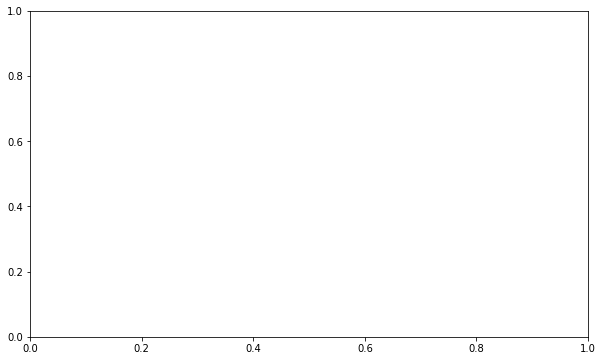

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# prediction


In [15]:
pre=knn.predict(X_test)

In [16]:
df2 = df2.rename(columns={'100100': 'PERID'})
dataframe1=df2
dataframe1['Criminal']=pre
db=dataframe1.iloc[:,[0,71]]
#pd.read_csv('prediction.csv')
db.to_csv('test_Predictions.csv',index=None)